# Exploratory Data Analysis on the Titanic dataset

[Data Set](https://www.kaggle.com/c/titanic)

Quick Acess:
  - [Home](#exploratory-data-analysis-on-the-titanic-dataset)

  - Data Cleaning 
    - [Checking Null Values](#checking-for-null-values)
    - [Filling Age](#filling-age)
    - [Droping Cabin](#dropping-cabin-as-it-has-a-lot-of-null-values)
    - [Filling Embarked](#filling-embarked)
    
  - [Cleaning the Data](#cleaning-the-data)

  - [Data Visualization](#analyzing-the-data)
    - [Survived & Sex](#testing-the-realtionship-between-survived-and-sex)
    - [Survived & Pclass](#testing-the-realtionship-between-survived-and-pclass)
    - [Survived & Age](#relationship-between-survived-and-age)
    - [Survived & SibSp](#relationship-between-survived-and-sibsp)
    - [Survived & Parch](#relationship-between-survived-and-parch)
    - [Survived & Embarked](#relationship-between-survived-and-embarked)

  - [Using ML alogs](#using-ml-algorithms-to-predict-the-outcome)

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

plt.style.use('dark_background')

In [251]:
# auto reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [252]:
df = pd.read_csv('data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [297]:
test_df = pd.read_csv("test.csv")

In [253]:
df.columns, df.shape

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 (891, 12))

### Data Cleaning

#### Checking for null values

In [254]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

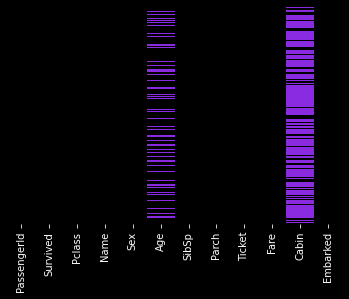

In [255]:
# Distribution of null values
# - cbar just shows the heat map bar on the right side.
# - cmap is the color map i.e which colors to use.
# - yticklabels is the y axis labels which is indicies for this data.
sns.heatmap(df.isna(), cbar=False, cmap=["#000", "blueviolet"], yticklabels=False)

#### Filling Age

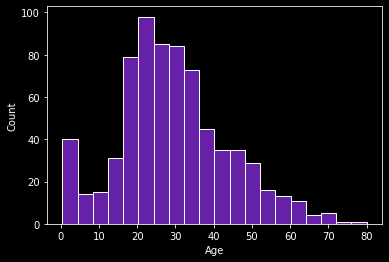

In [256]:
# Oberving Age 
age_no_null = df['Age'].dropna()
# - bins is the number of bars to show.
sns.histplot(age_no_null, kde=False,
            color= "blueviolet")
del age_no_null


In [257]:
# calculating p val of Pclass and age
from utils import calc_p_val
print(calc_p_val('Pclass', df))
del calc_p_val

(70.0389071809374, '0.00000 %')


This shows us that the pclass and age aren't realted, similary we can check all the values in the dataset with age.

In [258]:
from utils import fill_gaussian, get_age

box_df = df.copy()
mean_df = df.copy()
median_df = df.copy()
gaussian_df = fill_gaussian(df, 'Age')

# Filling the null values
box_df["Age"] = box_df[["Age","Pclass"]].apply(get_age, axis=1)
mean_df['Age'].fillna(df['Age'].mean(), inplace=True)
median_df['Age'].fillna(df['Age'].median(), inplace=True)



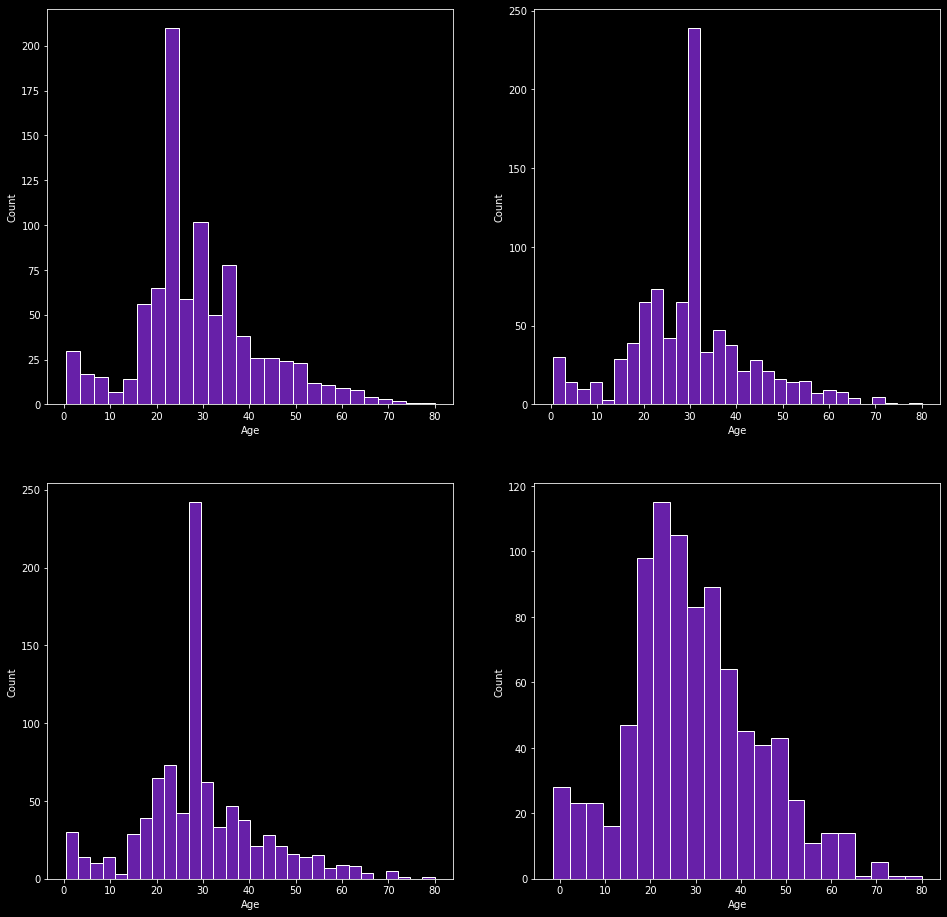

In [259]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

sns.histplot(box_df['Age'], ax=ax[0, 0], color='blueviolet')
sns.histplot(mean_df['Age'], ax=ax[0, 1], color='blueviolet')

sns.histplot(median_df['Age'], ax=ax[1, 0], color='blueviolet')
sns.histplot(gaussian_df['Age'], ax=ax[1, 1], color='blueviolet')

del fig, ax

In [260]:
from utils import calc_p_val
label = "Survived"

sim_dic = {
    "chi square": [],
    "p value": [],
}
for d in [box_df, mean_df,median_df,gaussian_df,df]:
    chi2, p_val = calc_p_val(label, d)
    sim_dic["chi square"].append(chi2)
    sim_dic["p value"].append(p_val)

res = pd.DataFrame(sim_dic,
    index=['box','mean', 'median', 'gaussian', 'actual'])

print(res)

del res, sim_dic, d, label, chi2, p_val
# del mean_df, median_df, gaussian_df

          chi square     p value
box         7.897904   1.92749 %
mean        7.897904   1.92749 %
median      7.897904   1.92749 %
gaussian    2.793557  24.73927 %
actual      4.994917   8.22939 %


In [261]:
df_age_filled = gaussian_df.copy()
# del gaussian_df, box_df, mean_df, median_df

#### Dropping Cabin as it has a lot of null values

In [262]:
# drop cabin column
# df_age_filled.drop(columns=['Cabin'], inplace=True)

#### Filling Embarked 
It is a categorical variable, and the amount of null values is very low. Therefore, we can fill the null values with the most common value i.e mode.

In [263]:
df_age_filled["Embarked"].isna().sum()

2

In [264]:
df_age_filled["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [265]:
mode = df_age_filled["Embarked"].mode()[0]
df_age_filled["Embarked"].fillna(mode, inplace=True)

del mode

In [266]:
# checking for null values and replacing the data frames
raw_df, df = df, df_age_filled.copy()
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<AxesSubplot:>

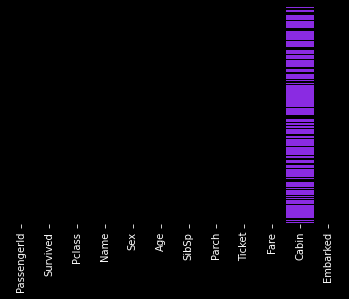

In [267]:
# Distribution of null values
# - cbar just shows the heat map bar on the right side.
# - cmap is the color map i.e which colors to use.
# - yticklabels is the y axis labels which is indicies for this data.
sns.heatmap(df.isna(), cbar=False, cmap=[
            "#000", "blueviolet"], yticklabels=False)
# As the heatmap is empty this inturn means that there are 
# no null values.

---

### Cleaning the data

In [268]:
col = df.columns
for idx, c in enumerate(col):
    print(c, end=" , ")
    if idx % 5 == 0:
        print()
del col, idx, c

PassengerId , 
Survived , Pclass , Name , Sex , Age , 
SibSp , Parch , Ticket , Fare , Cabin , 
Embarked , 

In [269]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analyzing the data

#### Testing the realtionship between Survived and Sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

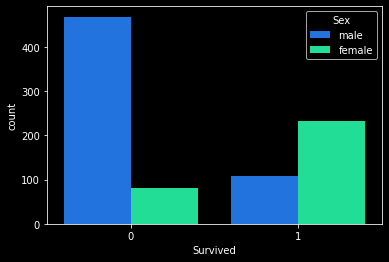

In [270]:
sns.countplot(x='Survived', hue='Sex', data=df,
              palette=['#036ffc', '#03fc9d'])


In [271]:
from utils import calc_p_val
print(calc_p_val('Survived', df, col_name='Sex'))

(263.05057407065567, '0.00000 %')


It seems that sex has nothing to do with if the person is survived or not.

#### Testing the realtionship between Survived and Pclass

<AxesSubplot:xlabel='Survived', ylabel='count'>

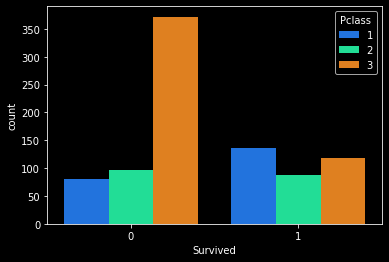

In [272]:
sns.countplot(x='Survived', hue='Pclass', data=df,
              palette=['#036ffc', '#03fc9d', '#ff8000'])


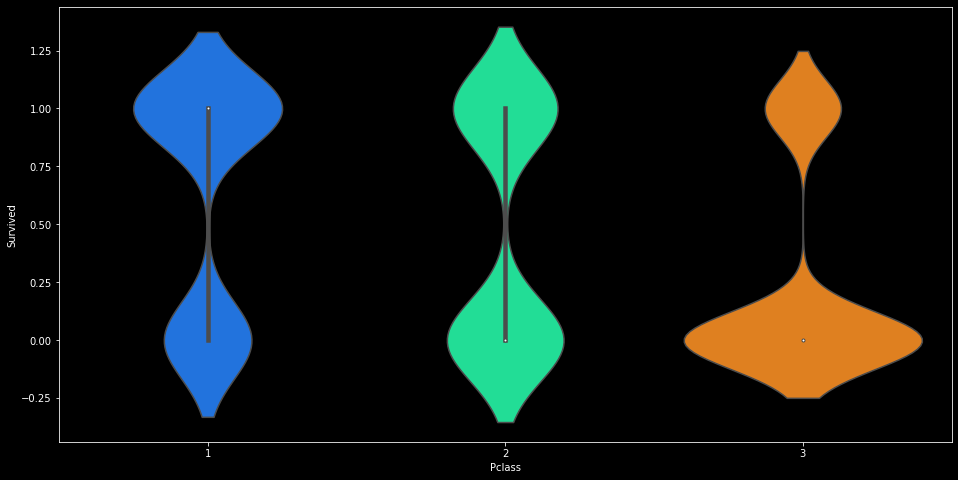

In [273]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

sns.violinplot(y='Survived', x='Pclass', data=df, ax=ax,
               palette=['#036ffc', '#03fc9d', '#ff8000'])

del fig, ax

In [274]:
from utils import calc_p_val
print(calc_p_val('Survived', df, col_name='Pclass'))

(102.88898875696056, '0.00000 %')


It's quite strange that P class i.e the pasenger class has nothing to do with if the person has survived or not.

#### Relationship between Survived and Age

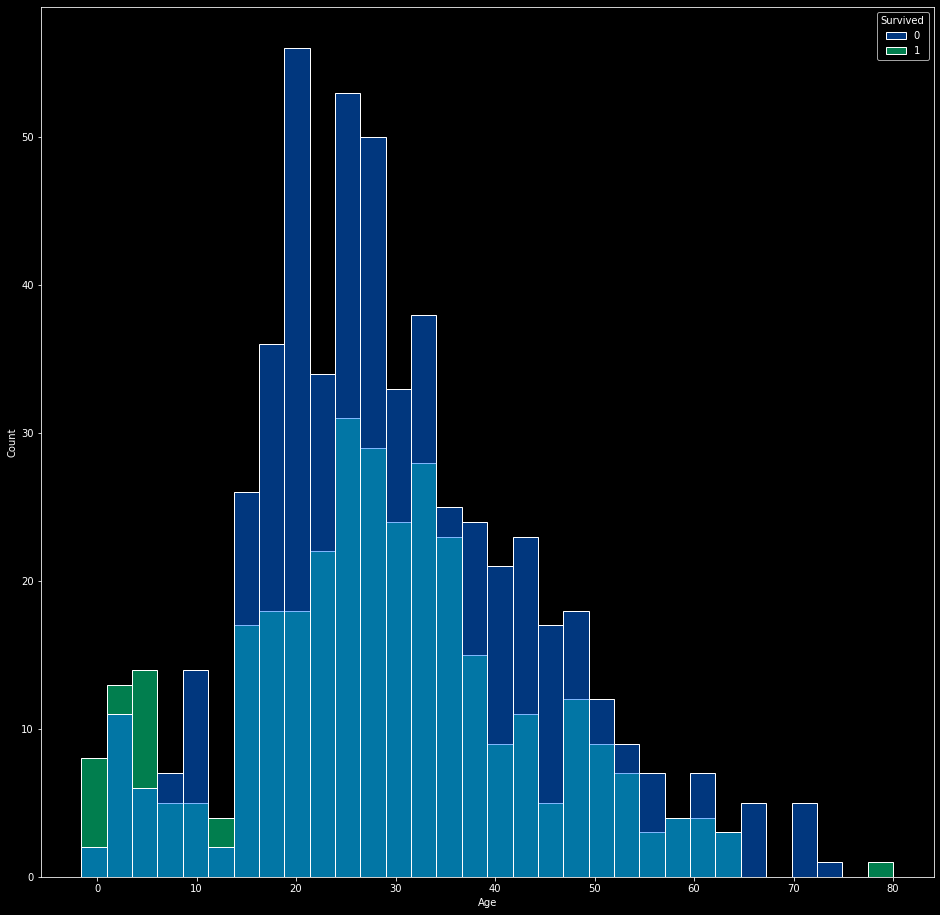

In [275]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))
sns.histplot(x='Age', hue='Survived', data=df, bins=32,
              palette=['#036ffc', '#03fc9d'], ax = ax)

del fig, ax

In [276]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [277]:
from utils import calc_p_val
print(calc_p_val('Survived', df, col_name='Age'))

(2.7935568224542613, '24.73927 %')


#### Relationship between Survived and SibSp

In [278]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

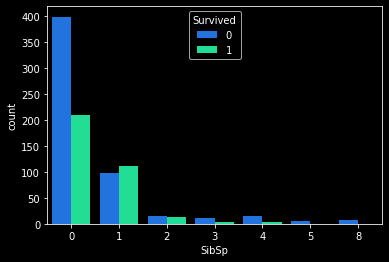

In [279]:
sns.countplot(x='SibSp', hue='Survived', data=df,
              palette=['#036ffc', '#03fc9d', '#ff8000'])

In [280]:
from utils import calc_p_val
print(calc_p_val('SibSp', df, col_name='Survived'))

(37.27179291520431, '0.00016 %')


#### Relationship between Survived and Parch

<AxesSubplot:xlabel='Parch', ylabel='count'>

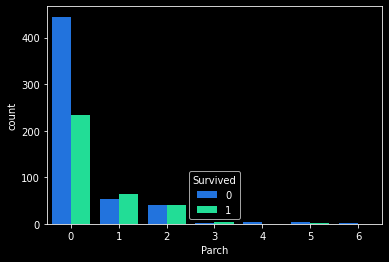

In [281]:
sns.countplot(x='Parch', hue='Survived', data=df,
              palette=['#036ffc', '#03fc9d', '#ff8000'])

In [282]:
from utils import calc_p_val
print(calc_p_val('Parch', df, col_name='Survived'))

(27.925784060236165, '0.00970 %')


The distribution of SibSp and Parch is quite similar. Therfore, let's check if they are connected.

In [283]:
from utils import calc_p_val
print(calc_p_val('Parch', df, col_name='SibSp'))

(341.6819870377193, '0.00000 %')


As p-value is almost zero, we can say that the relationship between SibSp and Parch is insignificant.

#### Relationship between Survived and Embarked

In [284]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

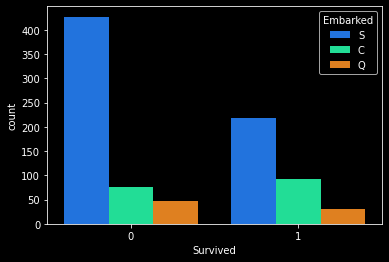

In [285]:
sns.countplot(x='Survived', hue='Embarked', data=df,
              palette=['#036ffc', '#03fc9d', '#ff8000'])


In [286]:
from utils import calc_p_val
print(calc_p_val('Embarked', df, col_name='Survived'))

(25.964452881874788, '0.00023 %')


--- 

### Converting Categorical Features & cleaning

In [287]:
from utils import transform_data
data_set = transform_data(df)


### Using ML algorithms to predict the outcome

In [288]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.ensemble import AdaBoostClassifier as AB
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn.ensemble import VotingClassifier as VC
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import IsolationForest as IF
from sklearn.ensemble import RandomTreesEmbedding as RT
from sklearn.ensemble import StackingClassifier as SC
from sklearn.ensemble import VotingRegressor as VR


In [289]:
def run_alg(x, y, model=None, ax=None, draw=True):
    from utils import model_stats
    from sklearn.model_selection import train_test_split

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

    model = LR(max_iter=200) if model is None else model
    model.fit(x_train, y_train)

    acc = model_stats(model, x_test, y_test, ax, draw)

    return acc


In [298]:
data_sets = [
     transform_data(gaussian_df),
     transform_data(box_df),
     transform_data(mean_df),
     transform_data(median_df)
]
data_sets_labels = ['Gaussian', 'Box', 'Mean', 'Median']


In [291]:
models = [
    LR(max_iter=200),
    SVC(),
    
    RF(),
    KNN(),
    NB(),

    DT(),
    MLP(),
    AB(),

    GB(),
    VC(estimators=['lr', 'rf', 'dt', 'mlp', 'ab', 'gb']),
    BC(),

    ET(),
    IF(),
    RT(),

    SC(estimators=['lr', 'rf', 'dt', 'mlp', 'ab', 'gb']),
    VR(estimators=['lr', 'rf', 'dt', 'mlp', 'ab', 'gb']),
]

models_labels = [
    "Logistic Regression",
    "Support Vector Machine",

    "Random Forest",
    "K Nearest Neighbors",
    "Naive Bayes",

    "Decision Tree",
    "Multi-Layer Perceptron",
    "AdaBoost",

    "Gradient Boosting",
    "Voting Classifier",
    "Bagging Classifier",

    "Extra Trees",
    "Isolation Forest",
    "Random Trees Embedding",

    "Stacking Classifier",
    "Voting Regressor"
]


In [299]:
from IPython.display import display, HTML
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
score = []
stats = []

models_zip = list(zip(models, models_labels))
models_zip = models_zip

itr = 10

for _ in range(itr):
    for model, model_label in models_zip:
        for dset, label in zip(data_sets, data_sets_labels):
            x, y = dset.drop(columns=['Survived']), dset['Survived']
            acc1 = run_alg(x, y, draw=False)

            x, y = dset["Age"], dset["Survived"]
            x = np.array(x).reshape(-1, 1)
            acc2 = run_alg(x, y, draw=False)

            stats.append([model_label, label, acc1, acc2])


In [293]:
stats = pd.DataFrame(
    stats, columns=["Model", 'Data Fill Type', 'Acc1', 'Acc2'])
raw_stats = stats.copy()


In [294]:
no_entries = 10

stats.sort_values(by="Acc1", ascending=False, inplace=True)
s1 = stats.head(no_entries).to_html()

stats.sort_values(by="Acc2", ascending=False, inplace=True)
display(HTML(f"""
    <table>
        <tr>
            <th>Sorted with accuracy 1 {s1}</th>
            <th>Sorted with accuracy 2 {stats.head(no_entries).to_html()}</th>
        </tr>
    </table>
"""))


,Model,Data Fill Type,Acc1,Acc2
9,Random Forest,Box,0.900000,0.577778
82,Logistic Regression,Mean,0.888889,0.600000
182,Logistic Regression,Mean,0.877778,0.655556
62,Logistic Regression,Mean,0.877778,0.466667
110,Random Forest,Mean,0.877778,0.644444
20,Logistic Regression,Gaussian,0.866667,0.622222
129,Random Forest,Box,0.866667,0.577778
173,K Nearest Neighbors,Box,0.855556,0.666667
130,Random Forest,Mean,0.855556,0.600000
40,Logistic Regression,Gaussian,0.855556,0.577778


In [295]:
stats.columns

Index(['Model', 'Data Fill Type', 'Acc1', 'Acc2'], dtype='object')

(0.7, 1.0)

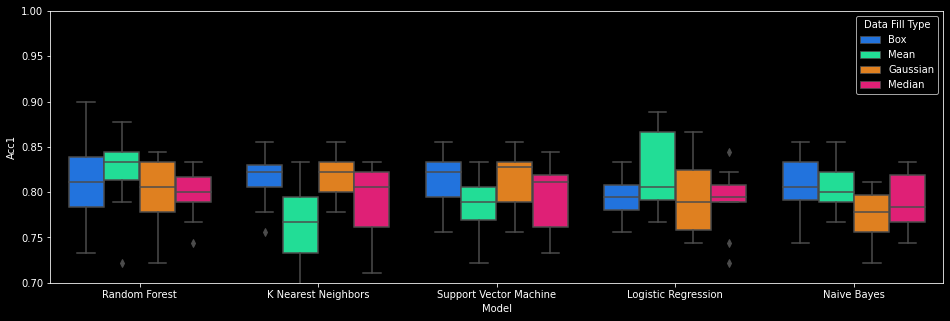

In [296]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
sns.boxplot(x="Model", y="Acc1",hue="Data Fill Type", data=stats,
            palette=['#036ffc', '#03fc9d', '#ff8000', "#ff0073"],
            ax=ax).set_ylim(0.7, 1)